
# Assignment 3  <font color="blue"> (15 points) </font>
 
***

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data. 
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.



## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data. 
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  


#Answers

## Part A

### Question 1

In [ ]:
# importing necessary packages
import pandas as pd
import numpy as np

# creating the x1 array
x1 = np.linspace(-20,20,100)

# creating x2,x3,x4,x5
exp_lst = [2,3,4,5]
var_lst = []
for i in exp_lst:
  var = []
  var = np.array([x**i for x in x1 ])
  var_lst.append(var)
x2,x3,x4,x5 = var_lst[0],var_lst[1],var_lst[2],var_lst[3]

### Questions 2

In [ ]:
# setting the parameter seed to order to maintain consistency
np.random.seed(1)

# creating the vector e
mu, sigma = 0,4
e = np.random.normal(mu, sigma, size=100)

# creating the y response
y = 1.75 + 5*x1 + 0.05*x3 - 10.3*x5 + e

### Question 3 & 4

Based on the data generated, it's already known that some coefficients will be close to or zero. Therefore, the scale of the alphas chosen was high.

In [ ]:
# importing the LDA and cross-validation pacakges
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

# defining some key paramaters
k = 5
kf =KFold(n_splits = k)

# adjustting the shape of the data

x_lst = []
data_lst = []
for x,y1 in zip(x1,y):
  var = []
  var = np.array([x, x**2, x**3, x**4, x**5])
  x_lst.append(var)
  var = np.array([y1,x, x**2, x**3, x**4, x**5])
  data_lst.append(var)
x = np.array(x_lst)
data = np.array(data_lst).reshape(100,6)
y = y.reshape(100,1)

# lasso regression with different values parameters 
alpha_values = [0.01,1,10,100,1000,10000,100000,1000000,10000000,100000000]
mse_lasso = []
for a in alpha_values:
  accuracy_lasso = 0
  for train_index, test_index in kf.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # fitting the model
        lasso = Lasso(alpha=a)
        lasso.fit(x_train, y_train)

        # checking the accuracy
        y_predict = lasso.predict(x_test)
        accuracy_lasso += mean_squared_error(y_test, y_predict)
  mse_lasso.append(accuracy_lasso/5)
  # priting the results for the alpha selected      
  print("MSE for Lasso with alpha = {} : {:.0f}".format(str(a), accuracy_lasso/5))

MSE for Lasso with alpha = 0.01 : 752142067825
MSE for Lasso with alpha = 1 : 752133045421
MSE for Lasso with alpha = 10 : 752051026119
MSE for Lasso with alpha = 100 : 751231086137
MSE for Lasso with alpha = 1000 : 743063465400
MSE for Lasso with alpha = 10000 : 664368197537
MSE for Lasso with alpha = 100000 : 414188730035
MSE for Lasso with alpha = 1000000 : 1434803
MSE for Lasso with alpha = 10000000 : 5676
MSE for Lasso with alpha = 100000000 : 49485


In order facilitate the visualization of the results, let's now plot them on a logaritimic scale.

(Text(0, 0.5, 'MSE (log scale)'),
 Text(0.5, 0, 'Lasso Alpha coefficient (log scale)'))

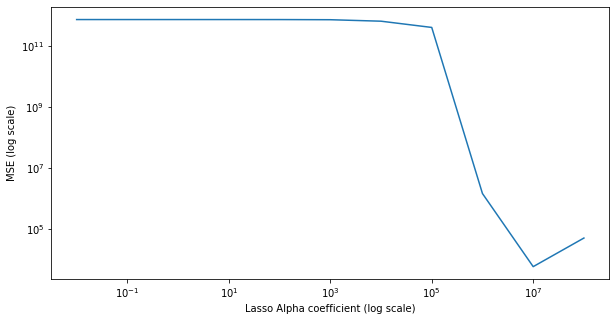

In [ ]:
# plotting the MSE vs alpha parameters
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(alpha_values, mse_lasso)
plt.yscale('log'), plt.xscale('log')
plt.ylabel('MSE (log scale)'), plt.xlabel('Lasso Alpha coefficient (log scale)')


The chart above tells us that the tunning paramerts with the lowest MSE is alpha = 10e7. Let's now evaluate if the model selected performs variabale selection

In [ ]:
lalasso = Lasso(alpha=10e7)
lasso.fit(x, y)
print(lasso.intercept_)
print(lasso.coef_)

[1.99233141]
[ -0.          -0.          -0.          -0.         -10.29970545]


Since the lasso coeficients x1 to x4 are zero, varibale selection occured. For that parameter, only x5 would be used.

## Part B

### Question 1

In [ ]:
# importing the necessary packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

# importing the wage data with pandas
wage_df = pd.read_csv('Wage.csv')
wage_df.head() # checking the dataset

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [ ]:
# checking for null values
wage_df.isnull().sum()

Unnamed: 0    0
year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [ ]:
# dividing the features and applying the 5-fold cross validation
data = np.array(wage_df[['wage','age']]).reshape(3000,2)
y = np.array(wage_df['wage']).reshape(3000,1)
x = np.array(wage_df['age']).reshape(3000,1)

# setting the cross validation parameters 
k = 5
kf = KFold(n_splits = k)

# defining the degress d for the polynomial fit
pd_lst = [2,3,4,5,6,7,8,9,10]
mse_poly_lst = []

for d in pd_lst:
  mse_accuracy = 0
  for train_index, test_index in kf.split(data):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # transforming the data
        polynomial_features = PolynomialFeatures(degree=d)
        x_train_p = polynomial_features.fit_transform(x_train)
        x_test_p = polynomial_features.fit_transform(x_test)

        # fitting the model
        model_poly = sm.OLS(y_train, x_train_p).fit()
        y_pred = model_poly.predict(x_test_p)
        mse_accuracy += mean_squared_error(y_test, y_pred)
  
  # pritning the MSE for Polynomial Regression
  print("MSE for Polynomial Regression of degree {} : {:.0f}".format(str(d), mse_accuracy/5))

  # adding value to the mse list
  mse_poly_lst.append(mse_accuracy/5)

MSE for Polynomial Regression of degree 2 : 1600
MSE for Polynomial Regression of degree 3 : 1595
MSE for Polynomial Regression of degree 4 : 1594
MSE for Polynomial Regression of degree 5 : 1595
MSE for Polynomial Regression of degree 6 : 1595
MSE for Polynomial Regression of degree 7 : 1596
MSE for Polynomial Regression of degree 8 : 1598
MSE for Polynomial Regression of degree 9 : 1599
MSE for Polynomial Regression of degree 10 : 1601


Based on the cross-validation performed above, the degrre of the Polynomial Regression with the least MSE is 4. Therefore, that's the degree that should be selected. Let's now fit the polynomial to the test data.

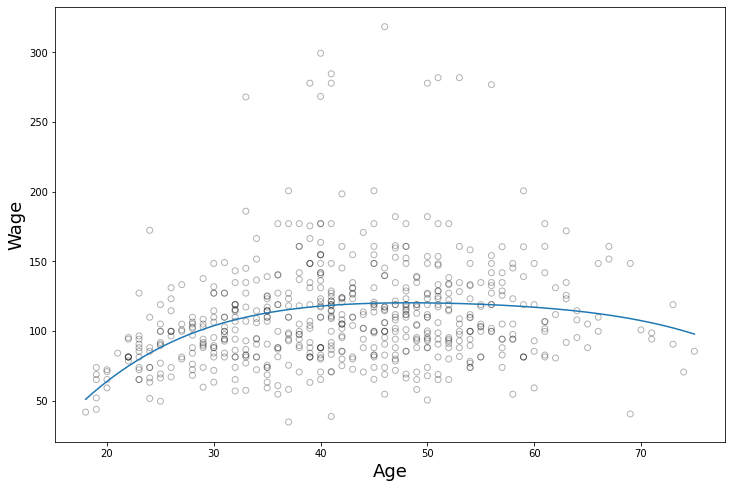

In [ ]:
# splitting the data into training and test
from sklearn.model_selection import train_test_split
y,x = np.array(wage_df['wage']).reshape(-1,1) , np.array(wage_df['age']).reshape(-1,1) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

# fitting the polynomial
polynomial_features = PolynomialFeatures(degree=4)
x_train_p = polynomial_features.fit_transform(X_train)
model_poly = sm.OLS(y_train, x_train_p).fit()

# testing the model with 600 points
X_test_p = np.array(np.linspace(X_test.min(),X_test.max( ),600)).reshape(-1,1)
x_test_p = polynomial_features.fit_transform(X_test_p)
y_pred = model_poly.predict(x_test_p)

# plotting the results
size2 = plt.figure(figsize = (12,8))
# We will plot the graph for 70 observations only
scatter2 = plt.scatter(X_test, y_test, facecolor='None', edgecolor='k', alpha=0.3)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Wage', fontsize=18)
prediction_plot2 = plt.plot(X_test_p, y_pred)



### Question 2

In [ ]:
# dividing the features and applying the 5-fold cross validation
data = np.array(wage_df[['wage','age']]).reshape(3000,2)
y = np.array(wage_df['wage']).reshape(3000,1)
x = np.array(wage_df['age']).reshape(3000,1)

# setting the cross validation parameters 
k = 5
kf = KFold(n_splits = k)

# defining the degress d for the polynomial fit
cuts_lst = [x for x in range(2,11)]
mse_cuts_lst = []

for c in cuts_lst:
  mse_accuracy = 0
  for train_index, test_index in kf.split(data):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # dividing the data into bins
        x_train, y_train = pd.Series(x_train.reshape(len(x_train),)),pd.Series(x_train.reshape(len(y_train),))
        df_cut, bins = pd.cut(x_train, c, retbins=True, right=True)
        df_steps = pd.concat([x_train, df_cut, y_train], keys=['age','age_cuts','wage'], axis=1)
        df_steps_dummies = pd.get_dummies(df_cut)

        # fitting the model
        step_model = sm.GLM(df_steps.wage, df_steps_dummies).fit()
        x_test = pd.Series(x_test.reshape(len(x_test),))
        bin_mapping = np.digitize(x_test, bins)
        x_test_valid = pd.get_dummies(bin_mapping)

        if len(x_test_valid.columns) == c:
            continue
        else:
          min = x_test_valid.sum().min()
          x_test_valid = x_test_valid.drop([c+1],axis=1)

        y_pred = step_model.predict(x_test_valid)
        mse_accuracy += mean_squared_error(y_test, y_pred)
  
  # pritning the MSE for Polynomial Regression
  print("MSE for Step function with {} cuts : {:.0f}".format(str(c), mse_accuracy/5))

  # adding value to the mse list
  mse_cuts_lst.append(mse_accuracy/5)

MSE for Step function with 2 cuts : 3870
MSE for Step function with 3 cuts : 3880
MSE for Step function with 4 cuts : 3839
MSE for Step function with 5 cuts : 3874
MSE for Step function with 6 cuts : 3855
MSE for Step function with 7 cuts : 3874
MSE for Step function with 8 cuts : 3848
MSE for Step function with 9 cuts : 3873
MSE for Step function with 10 cuts : 3857


The cross-validation indicates that the optimal number of cuts occurs with 4 bins. Therefore, let's fit the data with this parameter.

In [ ]:
# divinding the data into train and test
from sklearn.model_selection import train_test_split
y,x = wage_df['wage'], wage_df['age']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

# dividing the data into 4 bins as per above
df_cut, bins = pd.cut(X_train, 4, retbins=True, right=True)
df_steps = pd.concat([X_train, df_cut, y_train], keys=['age','age_cuts','wage'], axis=1)
df_steps_dummies = pd.get_dummies(df_cut)

# fitting the model
step_model = sm.GLM(df_steps.wage, df_steps_dummies).fit()

# tesing the prediction with 600 points
xp = np.linspace(X_test.min(),X_test.max()-1,600) 
bin_mapping = np.digitize(xp, bins)
X_valid_test = pd.get_dummies(bin_mapping)
pred = step_model.predict(X_valid_test)

<Figure size 864x576 with 0 Axes>

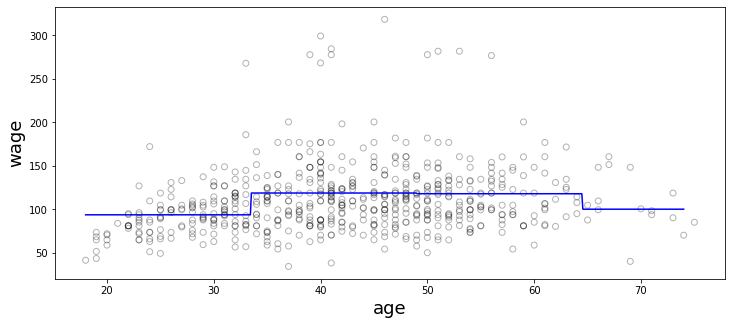

In [ ]:
size = plt.figure(figsize = (12,8))
# Visualisation
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))

# Scatter plot with polynomial regression line
_= ax1.scatter(X_test, y_test, facecolor='None', edgecolor='k', alpha=0.3)
_= ax1.plot(xp, pred, c='b')

_= ax1.set_xlabel('age',fontsize=18)
_= ax1.set_ylabel('wage',fontsize=18)
# plt.show()

## Part C

The datset selected for this question is Default.csv which can be found on the content section of our course

In [ ]:
# importing the necessary pacackages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


# importing the dataset
diabetes_df = pd.read_csv('diabetes.csv')

In [ ]:
# exploring the dataset
diabetes_df.describe(include='all')

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# checking for N/A's 
diabetes_df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [ ]:
# replacing the the columns with values as zero by the mean of the column
col_lst = ['preg','plas','pres','skin','test','mass']
for col in col_lst:
  col_mean = diabetes_df[col].mean()
  diabetes_df[col] = [ col_mean if x == 0 else x for x in diabetes_df[col]]    

In [ ]:
# spliting the data into variables for classification purposes
y = diabetes_df['class']
X = diabetes_df.loc[:,diabetes_df.columns != 'class']

### Random Forest Method

Let's apply the Random Forest method and, at the same time, define the optimal depth of our trees. The n_estimators will be kept as standard for simplicity.

In [ ]:
# splitting the data into train and test datsets 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

# Tunning the max depth tree parameters
acc_test, acc_train = [],[]            
depth = np.arange(1, 50)
# Calculate accuracy score on the test set for different depths of the trees
for i in depth:
    # Fit the Regression Tree
    dt = RandomForestClassifier(max_depth=i, random_state=1)
    dt.fit(X_train,y_train)
    # Predict on the test set
    y_pred = dt.predict(X_test)
    # Compute the accuracy
    score = accuracy_score(y_test, y_pred)  
    acc_test.append(score)
    acc_train.append(accuracy_score(y_train, dt.predict(X_train)))

print("The best depth of the trees is ", np.argmax(acc_test)+1, " with accuracy of ", np.amax(acc_test))  

The best depth of the trees is  9  with accuracy of  0.8181818181818182


### SVM Method

Let's now apply the support vector machine method to the same train and test data sets. Given we are using several variables, we will access what kernel type. An arbritary value of C will be used for simplicity


In [ ]:
# Tunning the C value    
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
# Calculate accuracy score on the test set for different depths of the trees
acc_test = {}  
for k in kernel_types:
    # Fit the Regression Tree
    svc_model = SVC(kernel=k, C=1E3)
    svc_model.fit(X_train,y_train)
    # Predict on the test set
    y_pred = svc_model.predict(X_test)
    # Compute the accuracy
    score = accuracy_score(y_test, y_pred)
    acc_test[k] = score

In [ ]:
print(acc_test)

{'linear': 0.7727272727272727, 'poly': 0.7727272727272727, 'rbf': 0.7402597402597403, 'sigmoid': 0.7077922077922078}


Based on the data above, an SVM with kernel linear/poly seems to be hte most accurate. However, when comparaing both methods in terms of accuracy, Random Forest yields the best performance: 0.81 vs 0.77.

## Part D

### Question 1

In [ ]:
# generating the cluster data
mean_d1 = [4, 4]
mean_d2 = [7, 7]
mean_d3 = [10, 10]
cov = [[1, 0], [0, 1]]
x1, y1 = np.random.multivariate_normal(mean_d1, cov, 500).T
x2, y2 = np.random.multivariate_normal(mean_d2, cov, 500).T
x3, y3 = np.random.multivariate_normal(mean_d3, cov, 500).T

# creting the colors for each cluster
color = np.array(["red" for i in range(500)]+["blue" for i in range(500)]+["green" for i in range(500)])

# concatenating the data
x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)
df = pd.DataFrame(data=np.hstack((x.reshape(-1,1), y.reshape(-1,1))),columns=['x','y'])


### Question 2

(Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, '2 -dimentional data with  500  observations from  3  Gaussian clusters'))

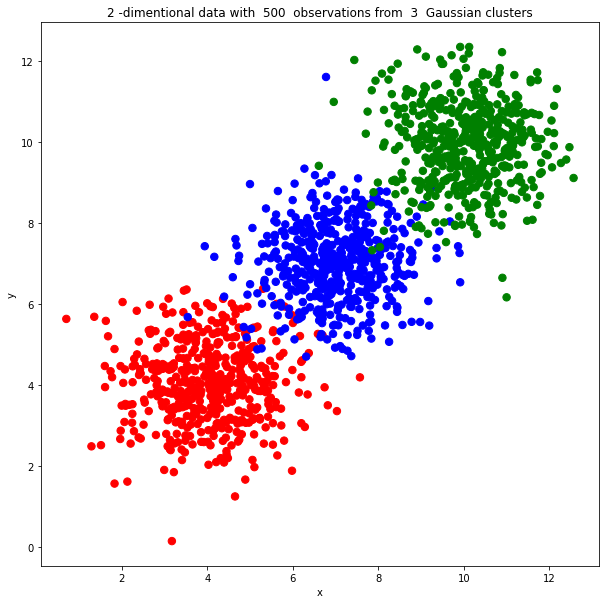

In [ ]:
# ploting the data as scatter plot
plt.figure(figsize=(10,10))
plt.scatter([x1,x2,x3], [y1,y2,y3],color=color,s=220, marker=".")
plt.xlabel('x'), plt.ylabel('y'), plt.title('2 -dimentional data with  500  observations from  3  Gaussian clusters')

### Question 3 & 4


In [ ]:
# shuffling the data
from sklearn.utils import shuffle
df_s = shuffle(df)
y,x = df_s['y'], df_s['x']


(Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), Text(0.5, 1.0, 'K=$4$'))

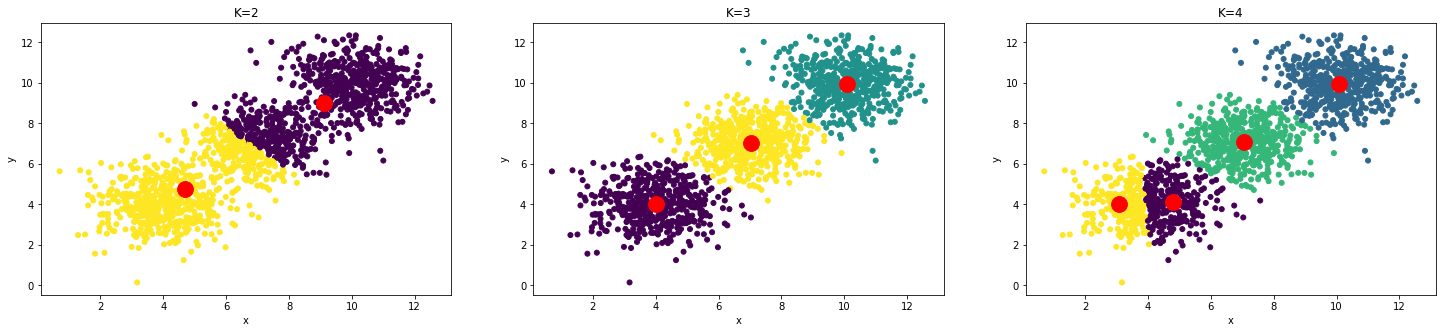

In [ ]:
# applying the K means with K=2,3,4 & visualizing the data
from sklearn.cluster import KMeans

kmeans_2,kmeans_3, kmeans_4  = KMeans(n_clusters=2).fit(df_s), KMeans(n_clusters=3).fit(df_s), KMeans(n_clusters=4).fit(df_s)
labels_2, labels_3, labels_4 = kmeans_2.predict(df_s), kmeans_3.predict(df_s), kmeans_4.predict(df_s)
centroids_2, centroids_3, centroids_4 = kmeans_2.cluster_centers_,  kmeans_3.cluster_centers_,  kmeans_4.cluster_centers_

fig, ax = plt.subplots(1, 3,figsize=(25,5))
ax[0].scatter(x, y,s=100, c= labels_2, marker = ".")
ax[0].scatter(centroids_2[:,0], centroids_2[:,1], c='red', s=1000, marker = ".")
ax[0].set_xlabel('x'), ax[0].set_ylabel('y'), ax[0].set_title('K=$2$')
ax[1].scatter(x, y,s=100, c= labels_3, marker = ".")
ax[1].scatter(centroids_3[:,0], centroids_3[:,1], c='red', s=1000, marker = ".")
ax[1].set_xlabel('x'), ax[1].set_ylabel('y'), ax[1].set_title('K=$3$')
ax[2].scatter(x, y,s=100, c= labels_4, marker = ".")
ax[2].scatter(centroids_4[:,0], centroids_4[:,1], c='red', s=1000, marker = ".")
ax[2].set_xlabel('x'), ax[2].set_ylabel('y'), ax[2].set_title('K=$4$')

